In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.shape

(5171, 4)

We have 5171 rows and 4 columns

In [6]:
df.drop(['Unnamed: 0', 'label_num'],axis=1,inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [7]:
df.shape

(5171, 2)

In [8]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


Assigning text and label to x and y respectively

In [9]:
df.isnull().sum()
X = df.drop('label',axis=1)
y = df.label

In [10]:
print(df.loc[45]['text'])  #randomly printing row [45]

Subject: re : new production - sitara deals needed
vance ,
deals # 348725 ( 6 / 10 - 6 / 30 ) and # 348729 ( 7 / 1 - 7 / 31 ) have been created and
entered in sitara for hesco .
hillary ,
do not confirm .
bob
vance l taylor
07 / 28 / 2000 01 : 24 pm
to : robert cotten / hou / ect @ ect
cc : lisa hesse / hou / ect @ ect , trisha hughes / hou / ect @ ect , heidi
withers / hou / ect @ ect , hillary mack / corp / enron @ enron , susan smith / hou / ect @ ect ,
donald p reinhardt / hou / ect @ ect , melissa graves / hou / ect @ ect
subject : new production - sitara deals needed
bob ,
the following production is now on - line and a ticket should be created and
entered into sitara based on the following :
counterparty meter volumes price period
hesco gathering oil co 9835 600 mmbtu / d 96 % gas daily less $ 0 . 14
6 / 10 - 7 / 31
samson lone star limited 9845 3000 mmbtu / d 100 % gas daily less $ 0 . 10 7 / 21 -
7 / 31
winn exploration co . , inc . 9847 800 mmbtu / d 100 % gas daily less $ 0 

In [11]:

print("shape of data:",df.shape)

print("\nno dimensions of data:",df.ndim)

print("\nsize of data:",df.size)

print("\nSum fo all null values:\n",df.isnull().sum())


shape of data: (5171, 2)

no dimensions of data: 2

size of data: 10342

Sum fo all null values:
 label    0
text     0
dtype: int64


In [12]:
print("Column Names :") #checking out column names
print(df.columns)

Column Names :
Index(['label', 'text'], dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [14]:
print("Count of label:\n",df['label'].value_counts()) #count of ham and spam respectively


Count of label:
 ham     3672
spam    1499
Name: label, dtype: int64


In [15]:
df['length'] = df.text.str.len()     #number of words in each row of text column
df.head()

,label,text,length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,spam,"Subject: photoshop , windows , office . cheap ...",414
4,ham,Subject: re : indian springs\r\nthis deal is t...,336


In [16]:
data= df

**DATA PREPROCESSING**

Removing commas and full-stops.

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# Function to remove punctuations.
def remove_punctuation(text):
    noPunct_text = "".join([char for char in text if char not in string.punctuation])
    return noPunct_text
#new column without punctuation
data["cleaned_text"] = data["text"].apply(lambda x: remove_punctuation(x))

data.head()

,label,text,length,cleaned_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...


**TOKENIZATION**

In [19]:
import nltk

from nltk.tokenize import word_tokenize

# tokenized the 'text' column
data['tokenized_text'] = data['cleaned_text'].apply(lambda x: word_tokenize(x))
data.head()


,label,text,length,cleaned_text,tokenized_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a..."
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,..."


In [20]:
tok_text = data.loc[0, 'tokenized_text']
print(tok_text)

['Subject', 'enron', 'methanol', 'meter', '988291', 'this', 'is', 'a', 'follow', 'up', 'to', 'the', 'note', 'i', 'gave', 'you', 'on', 'monday', '4', '3', '00', 'preliminary', 'flow', 'data', 'provided', 'by', 'daren', 'please', 'override', 'pop', 's', 'daily', 'volume', 'presently', 'zero', 'to', 'reflect', 'daily', 'activity', 'you', 'can', 'obtain', 'from', 'gas', 'control', 'this', 'change', 'is', 'needed', 'asap', 'for', 'economics', 'purposes']


**REMOVING** **STOPWORDS** **USING nltk**

In [21]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]  # to remove all stopwords
    return text
#new column with stopwords removed
data["No_stopwords_text"] = data["tokenized_text"].apply(lambda x: remove_stopwords(x))
data.head()

,label,text,length,cleaned_text,tokenized_text,No_stopwords_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w..."
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p..."


In [22]:
no_stopwords = data.loc[0, 'No_stopwords_text']
print(no_stopwords)

['Subject', 'enron', 'methanol', 'meter', '988291', 'follow', 'note', 'gave', 'monday', '4', '3', '00', 'preliminary', 'flow', 'data', 'provided', 'daren', 'please', 'override', 'pop', 'daily', 'volume', 'presently', 'zero', 'reflect', 'daily', 'activity', 'obtain', 'gas', 'control', 'change', 'needed', 'asap', 'economics', 'purposes']


**STEMMING and LEMMATIZATION**

In [23]:
# ps = nltk.PorterStemmer()

# def stemming(t_text):
#     text = [ps.stem(word) for word in t_text]
#     return text

# data["stemmed_text"] = data["No_stopwords_text"].apply(lambda x: stemming(x))
# data.head()

In [24]:
# Stem_text = data.loc[0, 'stemmed_text']
# print(Stem_text)

 Stemming and lemmatization serve similar purposes,Stemming tends to be faster but less precise. Whereas Lemmatization is preferred in tasks where linguistic accuracy is more critical. Hence, using just the lemmatization.

In [25]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text
#new column with lemmatized text
data["lemmatized_text"] = data["No_stopwords_text"].apply(lambda x: lemmatizer(x))
data.head()

,label,text,length,cleaned_text,tokenized_text,No_stopwords_text,lemmatized_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[Subject, enron, methanol, meter, 988291, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[Subject, hpl, nom, january, 9, 2001, see, att..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[Subject, neon, retreat, ho, ho, ho, around, w..."
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, window, office, cheap, ma..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[Subject, indian, spring, deal, book, teco, pv..."


In [26]:
lemma_text = data.loc[0, 'lemmatized_text']
print(lemma_text)

['Subject', 'enron', 'methanol', 'meter', '988291', 'follow', 'note', 'gave', 'monday', '4', '3', '00', 'preliminary', 'flow', 'data', 'provided', 'daren', 'please', 'override', 'pop', 'daily', 'volume', 'presently', 'zero', 'reflect', 'daily', 'activity', 'obtain', 'gas', 'control', 'change', 'needed', 'asap', 'economics', 'purpose']


In [27]:
data['lemma_text_len']=data.lemmatized_text.str.len() #length of each document of column with lemmatized text
data.head()

,label,text,length,cleaned_text,tokenized_text,No_stopwords_text,lemmatized_text,lemma_text_len
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[Subject, enron, methanol, meter, 988291, foll...",35
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[Subject, hpl, nom, january, 9, 2001, see, att...",15
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[Subject, neon, retreat, ho, ho, ho, around, w...",220
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, window, office, cheap, ma...",44
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[Subject, indian, spring, deal, book, teco, pv...",29


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              5171 non-null   object
 1   text               5171 non-null   object
 2   length             5171 non-null   int64 
 3   cleaned_text       5171 non-null   object
 4   tokenized_text     5171 non-null   object
 5   No_stopwords_text  5171 non-null   object
 6   lemmatized_text    5171 non-null   object
 7   lemma_text_len     5171 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 323.3+ KB


VISUALISING THE CLEANED WORD WITH ORIGINAL TEXT

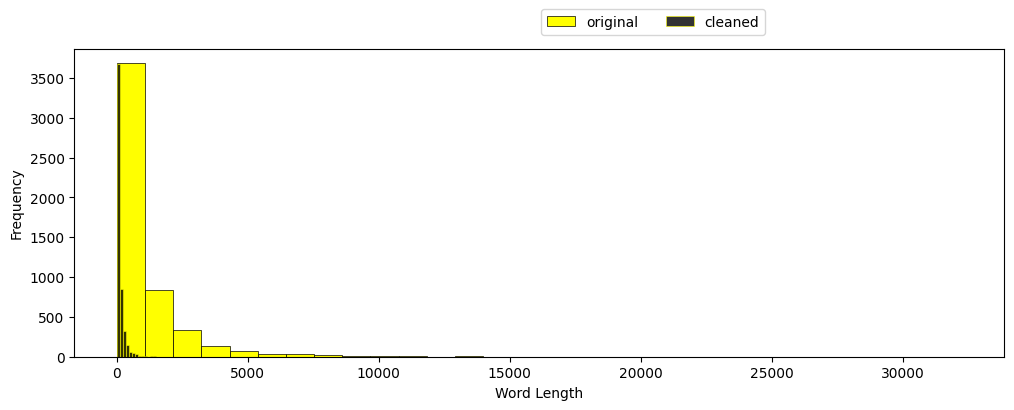

In [32]:
#x-axis =="length", separated by label,('ham' and 'spam')
data['length'].plot(bins=30, kind='hist', figsize=(12, 4), facecolor='#FFFF00', edgecolor='#000000', linewidth=0.5)
data['lemma_text_len'].plot(bins=30, kind='hist', figsize=(12, 4), alpha=0.8, facecolor='#000000', edgecolor='#FFFF00', linewidth=0.5)

plt.xlabel("Word Length")
plt.legend(['original', 'cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()


**EXPLORATORY DATA ANALYSIS**

In [33]:
eda_data=data

In [34]:
# number of character in orginal text data
eda_data['num_characters'] = data['text'].apply(len)
# number of words and characters in lemmatized text
eda_data['number_of_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
eda_data['number_of_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

eda_data.head()

,label,text,length,cleaned_text,tokenized_text,No_stopwords_text,lemmatized_text,lemma_text_len,num_characters,number_of_words,number_of_sentences
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[Subject, enron, methanol, meter, 988291, foll...",35,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[Subject, hpl, nom, january, 9, 2001, see, att...",15,97,24,3
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[Subject, neon, retreat, ho, ho, ho, around, w...",220,2524,551,24
3,spam,"Subject: photoshop , windows , office . cheap ...",414,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, window, office, cheap, ma...",44,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,336,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[Subject, indian, spring, deal, book, teco, pv...",29,336,71,3


In [35]:
#for ham
eda_data[eda_data['label'] == 'ham'][['num_characters','number_of_words','number_of_sentences']].describe()


,num_characters,number_of_words,number_of_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [36]:
#for Spam
eda_data[eda_data['label'] == 'spam'][['num_characters','number_of_words','number_of_sentences']].describe()

,num_characters,number_of_words,number_of_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


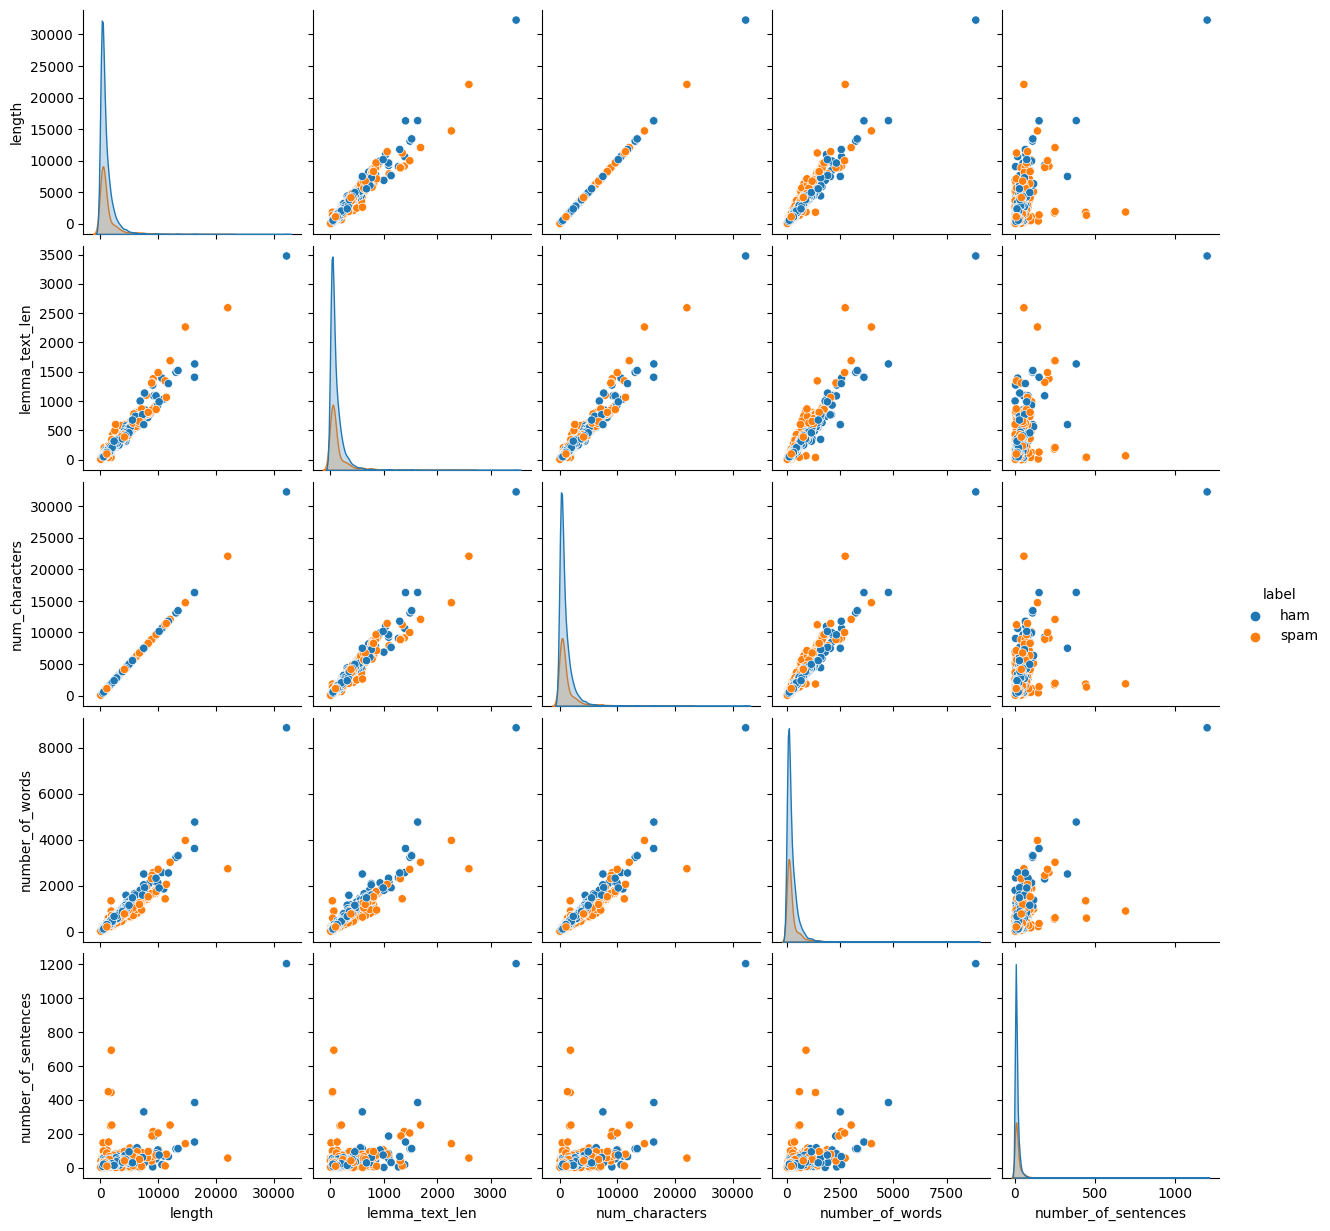

In [37]:
sns.pairplot(eda_data,hue='label')

<ipython-input-38-06df5cfc5b8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(eda_data.corr(),annot=True)


<Axes: >

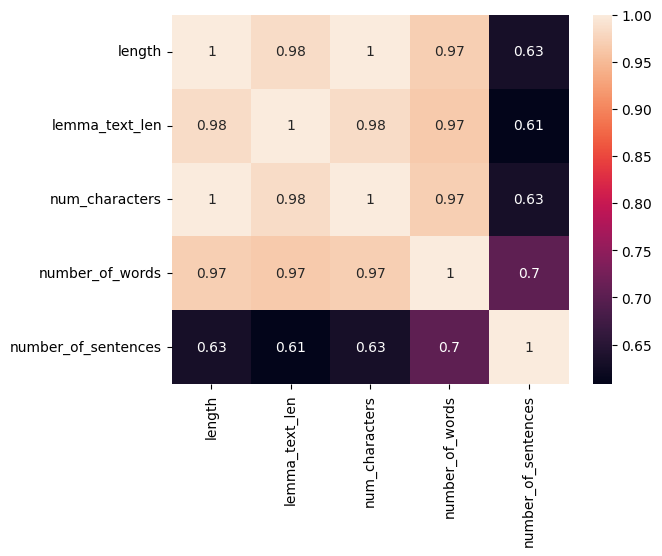

In [38]:
sns.heatmap(eda_data.corr(),annot=True)

<ipython-input-39-883135d9b1cd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # nice and clean grid


Text(0.5, 0, 'Word Length')

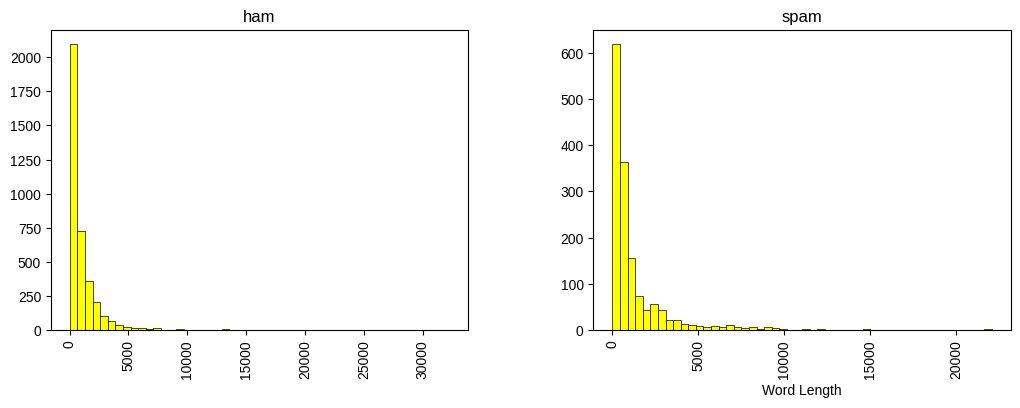

In [39]:
# x-axis ="length", separated by label,('ham' and 'spam')
data.hist(column='length', by='label', bins=50,figsize=(12,4), facecolor = '#FFFF00', edgecolor='#000000', linewidth=0.5 );
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")

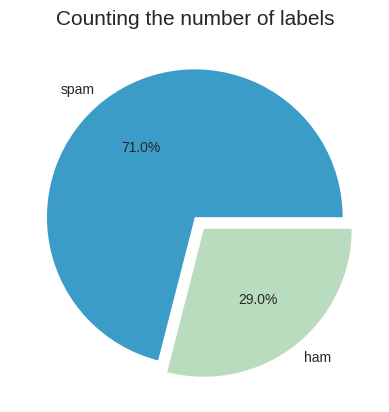

In [40]:
#using pie chart to show the count of ham and spam emails
# only "explode" the 2nd slice (i.e. 'spam')
explode = (0, 0.1)
#add colors
colors = ['#3b9dc7','#badcbe']
plt.pie(data['label'].value_counts(), labels=['spam','ham'],autopct='%1.1f%%',colors=colors,explode=explode)
plt.title("Counting the number of labels",fontsize=15);
plt.show()

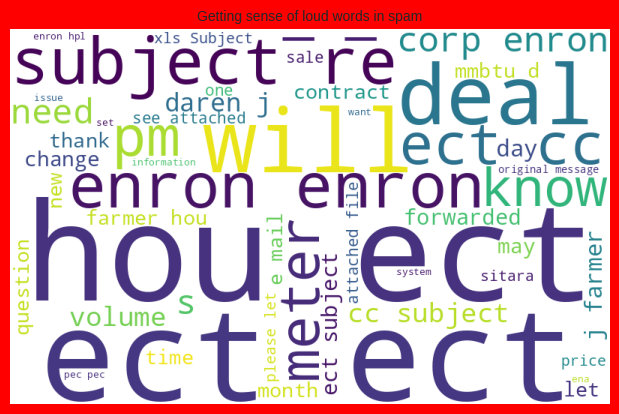

In [41]:
#Getting sense of loud words in spam

spams = data['text'][data['label']=='ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(6,5),facecolor='r')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=10);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


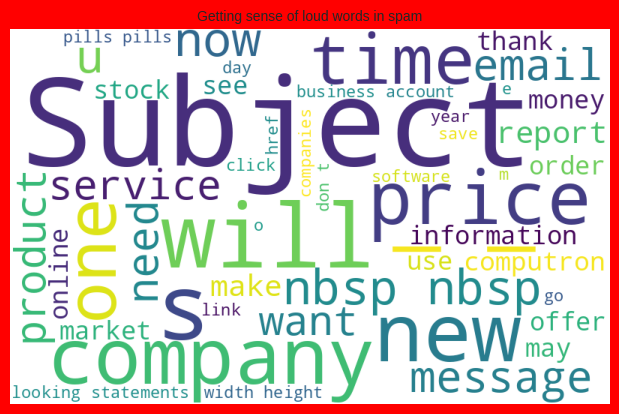

In [42]:
#Getting sense of loud words in spam

spams = data['text'][data['label']=='spam']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(6,5),facecolor='r')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=10);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


**SAVING CLEANED DATA TO A NEW CSV FILE**

In [43]:
eda_data.to_csv('/content/eda_data_updated.csv', index=False)


In [44]:
from google.colab import files
files.download('/content/eda_data_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**VECTORIZATION** using TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming data['lemmatized_text'] is a list of lists
data['lemmatized_text_str'] = data['lemmatized_text'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data using the vectorizer
vectors = vectorizer.fit_transform(data['lemmatized_text_str'])
print("TF-IDF Matrix Shape:", vectors.shape)

# Assigned the TF-IDF vectors to the 'features' variable
features = vectors


TF-IDF Matrix Shape: (5171, 47903)


**APPLYING ML ALGORITHMS**

In [46]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=123)


**Multinomial Naive Bayes**

In [47]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_nb),5)))
k1=round(accuracy_score(y_test,y_pred_nb),5)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       571
        spam       1.00      0.95      0.97       205

    accuracy                           0.99       776
   macro avg       0.99      0.97      0.98       776
weighted avg       0.99      0.99      0.99       776

Accuracy score: 0.98582


In [48]:
from sklearn.metrics import precision_score
j1=round(precision_score(y_test, y_pred_nb, average='macro'),5) #printing precision score
j1

0.99055

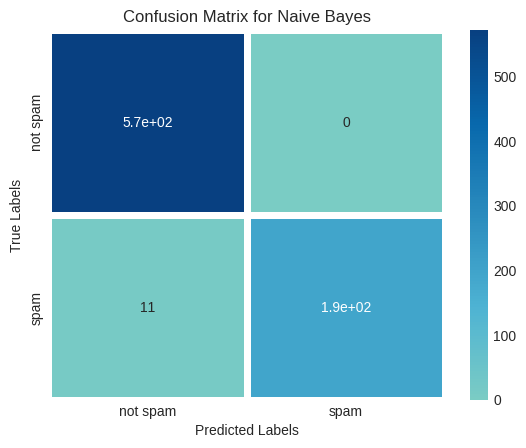

In [49]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_nb)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Naive Bayes')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

**Support Vector Machine**

In [50]:
# Import Support vector Machine
from sklearn.svm import SVC

#Training multiple machine learning algorithms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(clf, features, targets):
    clf.fit(features, targets)
def predict(clf, features):
    return (clf.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred_svm = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred_svm)]))

In [51]:
pred_scores_word_vectors

[('SVC', [0.9858247422680413])]

In [52]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred_svm))
print("Accuracy score: {}".format(round(accuracy_score(y_test,pred_svm),5)))
k2=round(accuracy_score(y_test,pred_svm),5)

Classification report
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       571
        spam       0.96      0.99      0.97       205

    accuracy                           0.99       776
   macro avg       0.98      0.99      0.98       776
weighted avg       0.99      0.99      0.99       776

Accuracy score: 0.98582


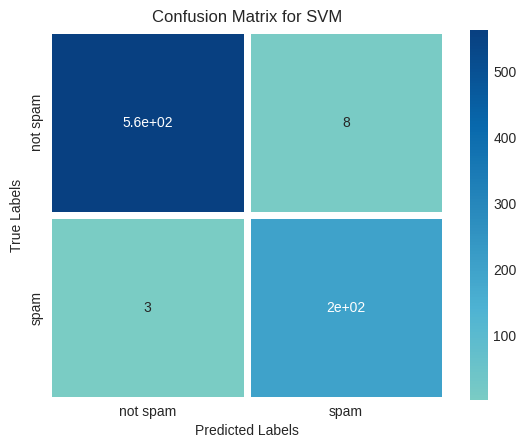

In [53]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred_svm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

**Random Forest Classifier**

In [54]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [55]:
y_pred_rf = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='spam', average='binary')
print(classification_report(y_test,y_pred_rf))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_rf),5)))
k3=round(accuracy_score(y_test,y_pred_rf),5)

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       571
        spam       1.00      0.64      0.78       205

    accuracy                           0.91       776
   macro avg       0.94      0.82      0.86       776
weighted avg       0.92      0.91      0.90       776

Accuracy score: 0.90593


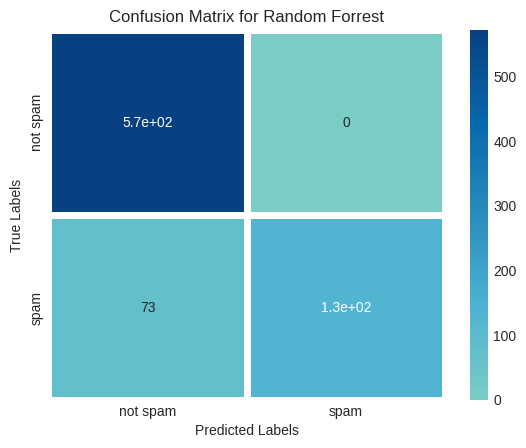

In [56]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_rf)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Random Forrest')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

**K-Nearest Neighbor**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore", category=DeprecationWarning)

clf = KNeighborsClassifier(n_neighbors=149, weights='uniform', algorithm='auto', p=1,metric='euclidean', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_knn),5)));
k4=round(accuracy_score(y_test,y_pred_knn),5)

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       571
        spam       0.96      0.80      0.88       205

    accuracy                           0.94       776
   macro avg       0.95      0.90      0.92       776
weighted avg       0.94      0.94      0.94       776

Accuracy score: 0.94072


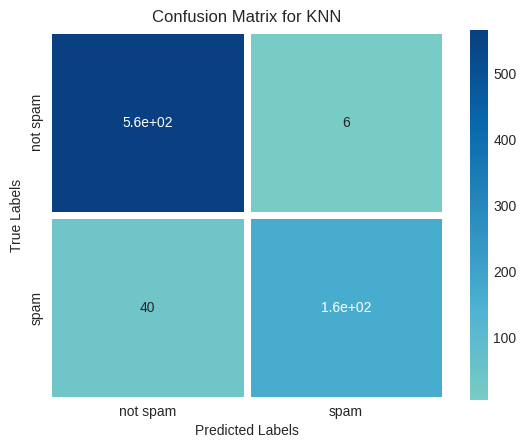

In [58]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_knn)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for KNN')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

**Logistic Regression**

In [59]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from numpy.random import RandomState
from sklearn import preprocessing

seed = RandomState()
warnings.filterwarnings("ignore", category=DeprecationWarning)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred_lr = logisticRegr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_lr),5)));
k5=round(accuracy_score(y_test,y_pred_lr),5)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       571
        spam       0.97      0.98      0.97       205

    accuracy                           0.99       776
   macro avg       0.98      0.98      0.98       776
weighted avg       0.99      0.99      0.99       776

Accuracy score: 0.98582


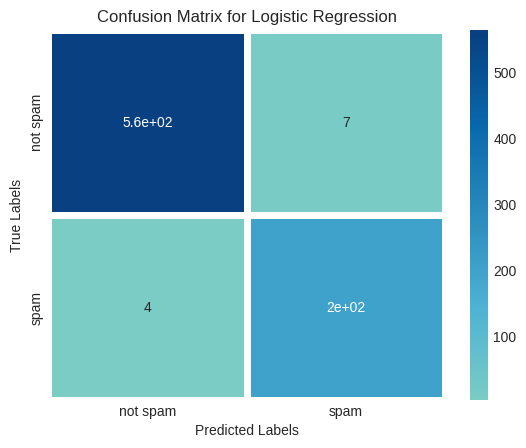

In [60]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_lr)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,center=0,cmap="GnBu")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Logistic Regression')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

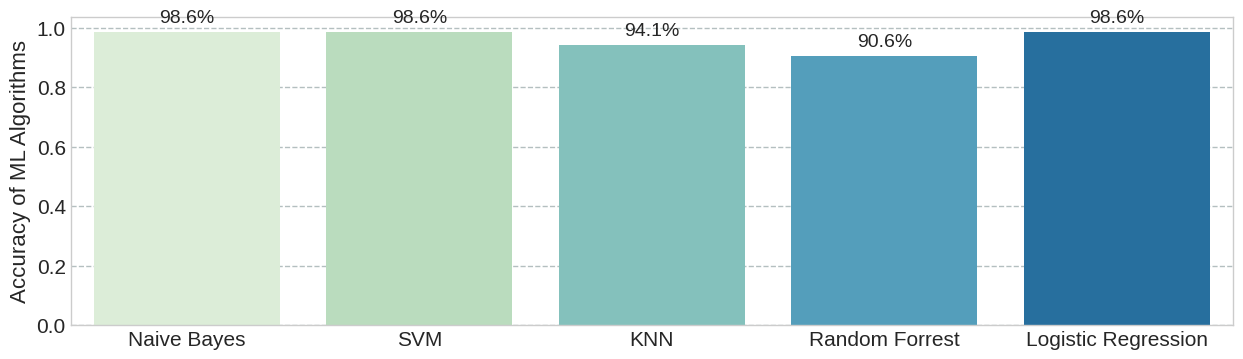

In [61]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

fig, ax = plt.subplots(figsize=(15,4))  # Adjust the figure size as needed

warnings.filterwarnings("ignore", category=FutureWarning)

algos = ['Naive Bayes', 'SVM', 'KNN', 'Random Forrest', 'Logistic Regression']
acc = [k1, k2, k4, k3, k5]

# Use sns.barplot for plotting
gr = sns.barplot(x=algos, y=acc, palette="GnBu")

# Customize the plot
ax.set_ylabel("Accuracy of ML Algorithms", fontsize=16)
ax.tick_params(labelsize=15)

# Annotate bars with values
for p in gr.patches:
    gr.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()
